<a href="https://colab.research.google.com/github/saradhasarah12/Parkinsons-disease/blob/main/PARKINSON_8_12_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21ADR045
SARADHA B
KNN CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import  BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

import xgboost as xgb
data = pd.read_csv('/content/2PD01 - 1 PD01.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 64 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Participant code                                                                      80 non-null     object 
 1   Age (years)                                                                           80 non-null     int64  
 2   Gender                                                                                80 non-null     object 
 3   Positive history of Parkinson disease in family                                       80 non-null     object 
 4   Age of disease onset (years)                                                          80 non-null     int64  
 5   Duration of disease from first symptoms (years)                                       8

In [5]:
df_1=pd.DataFrame(data)

In [6]:
df_1.head()

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1
0,PD01,58,F,No,56,2.0,No,No,No,No,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD02,68,F,No,67,1.0,No,No,No,No,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD03,68,M,No,67,1.0,No,No,No,No,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD04,75,M,No,73,2.0,No,No,No,No,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD05,61,M,Yes,60,0.7,No,No,No,No,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [7]:
df_1=df.drop(['Participant code','Antidepressant therapy','Clonazepam (mg/day)','Antipsychotic medication','Levodopa equivalent (mg/day)'],axis=1)

In [8]:
df_1['Gender'].replace(['F','M'],[0,1],inplace=True)

In [9]:
df_1['Positive history of Parkinson disease in family'].replace(['Yes','No'],[0,1],inplace=True)

In [10]:
df_1['Benzodiazepine medication'].replace(['Yes','No'],[0,1],inplace=True)

In [11]:
df_1['Antiparkinsonian medication'].replace(['Yes','No'],[0,1],inplace=True)

In [13]:
df_1

,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antiparkinsonian medication,Benzodiazepine medication,UPDRS III total (-),18. Speech,19. Facial Expression,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1
0,58,0,1,56,2.0,1,1,8,0,1,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,68,0,1,67,1.0,1,1,22,1,1,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,68,1,1,67,1.0,1,1,19,0,2,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,75,1,1,73,2.0,1,1,24,0,2,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,61,1,0,60,0.7,1,1,54,1,3,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,77,1,1,74,3.0,1,1,6,0,0,...,3.85,379,671,14.68,40.37,0.039,-24.31,1.5,21.00,52
76,73,1,1,68,5.0,1,1,3,0,1,...,-1.97,143,307,38.18,22.37,0.555,-21.27,5.0,15.44,69
77,72,0,1,69,3.0,1,1,3,0,0,...,5.30,178,260,74.16,22.37,-0.318,-16.02,5.0,24.07,117
78,59,1,1,50,9.0,1,1,5,0,1,...,4.61,178,317,58.27,29.13,-0.347,-19.73,5.0,16.04,90


In [14]:
df_1.isnull().sum()

Age (years)                                                                              0
Gender                                                                                   0
Positive history of Parkinson disease in family                                          0
Age of disease onset (years)                                                             0
Duration of disease from first symptoms (years)                                          0
Antiparkinsonian medication                                                              0
Benzodiazepine medication                                                                0
UPDRS III total (-)                                                                      0
18. Speech                                                                               0
19. Facial Expression                                                                    0
20. Tremor at Rest - head                                                                0

In [15]:
df = df_1.dropna(axis = 0)
print(f"Before dropping all NaN values: {data.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (80, 64)
After dropping all NaN values: (80, 59)


In [16]:
df_1.index = range(0,len(df_1),1)
df_1.head()

,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antiparkinsonian medication,Benzodiazepine medication,UPDRS III total (-),18. Speech,19. Facial Expression,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1
0,58,0,1,56,2.0,1,1,8,0,1,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,68,0,1,67,1.0,1,1,22,1,1,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,68,1,1,67,1.0,1,1,19,0,2,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,75,1,1,73,2.0,1,1,24,0,2,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,61,1,0,60,0.7,1,1,54,1,3,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 59 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Age (years)                                                                           80 non-null     int64  
 1   Gender                                                                                80 non-null     int64  
 2   Positive history of Parkinson disease in family                                       80 non-null     int64  
 3   Age of disease onset (years)                                                          80 non-null     int64  
 4   Duration of disease from first symptoms (years)                                       80 non-null     float64
 5   Antiparkinsonian medication                                                           8

In [ ]:
#df_1["BMI"]=df_1['BMI'].astype(int)

In [18]:
df_1

,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antiparkinsonian medication,Benzodiazepine medication,UPDRS III total (-),18. Speech,19. Facial Expression,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1
0,58,0,1,56,2.0,1,1,8,0,1,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,68,0,1,67,1.0,1,1,22,1,1,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,68,1,1,67,1.0,1,1,19,0,2,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,75,1,1,73,2.0,1,1,24,0,2,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,61,1,0,60,0.7,1,1,54,1,3,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,77,1,1,74,3.0,1,1,6,0,0,...,3.85,379,671,14.68,40.37,0.039,-24.31,1.5,21.00,52
76,73,1,1,68,5.0,1,1,3,0,1,...,-1.97,143,307,38.18,22.37,0.555,-21.27,5.0,15.44,69
77,72,0,1,69,3.0,1,1,3,0,0,...,5.30,178,260,74.16,22.37,-0.318,-16.02,5.0,24.07,117
78,59,1,1,50,9.0,1,1,5,0,1,...,4.61,178,317,58.27,29.13,-0.347,-19.73,5.0,16.04,90


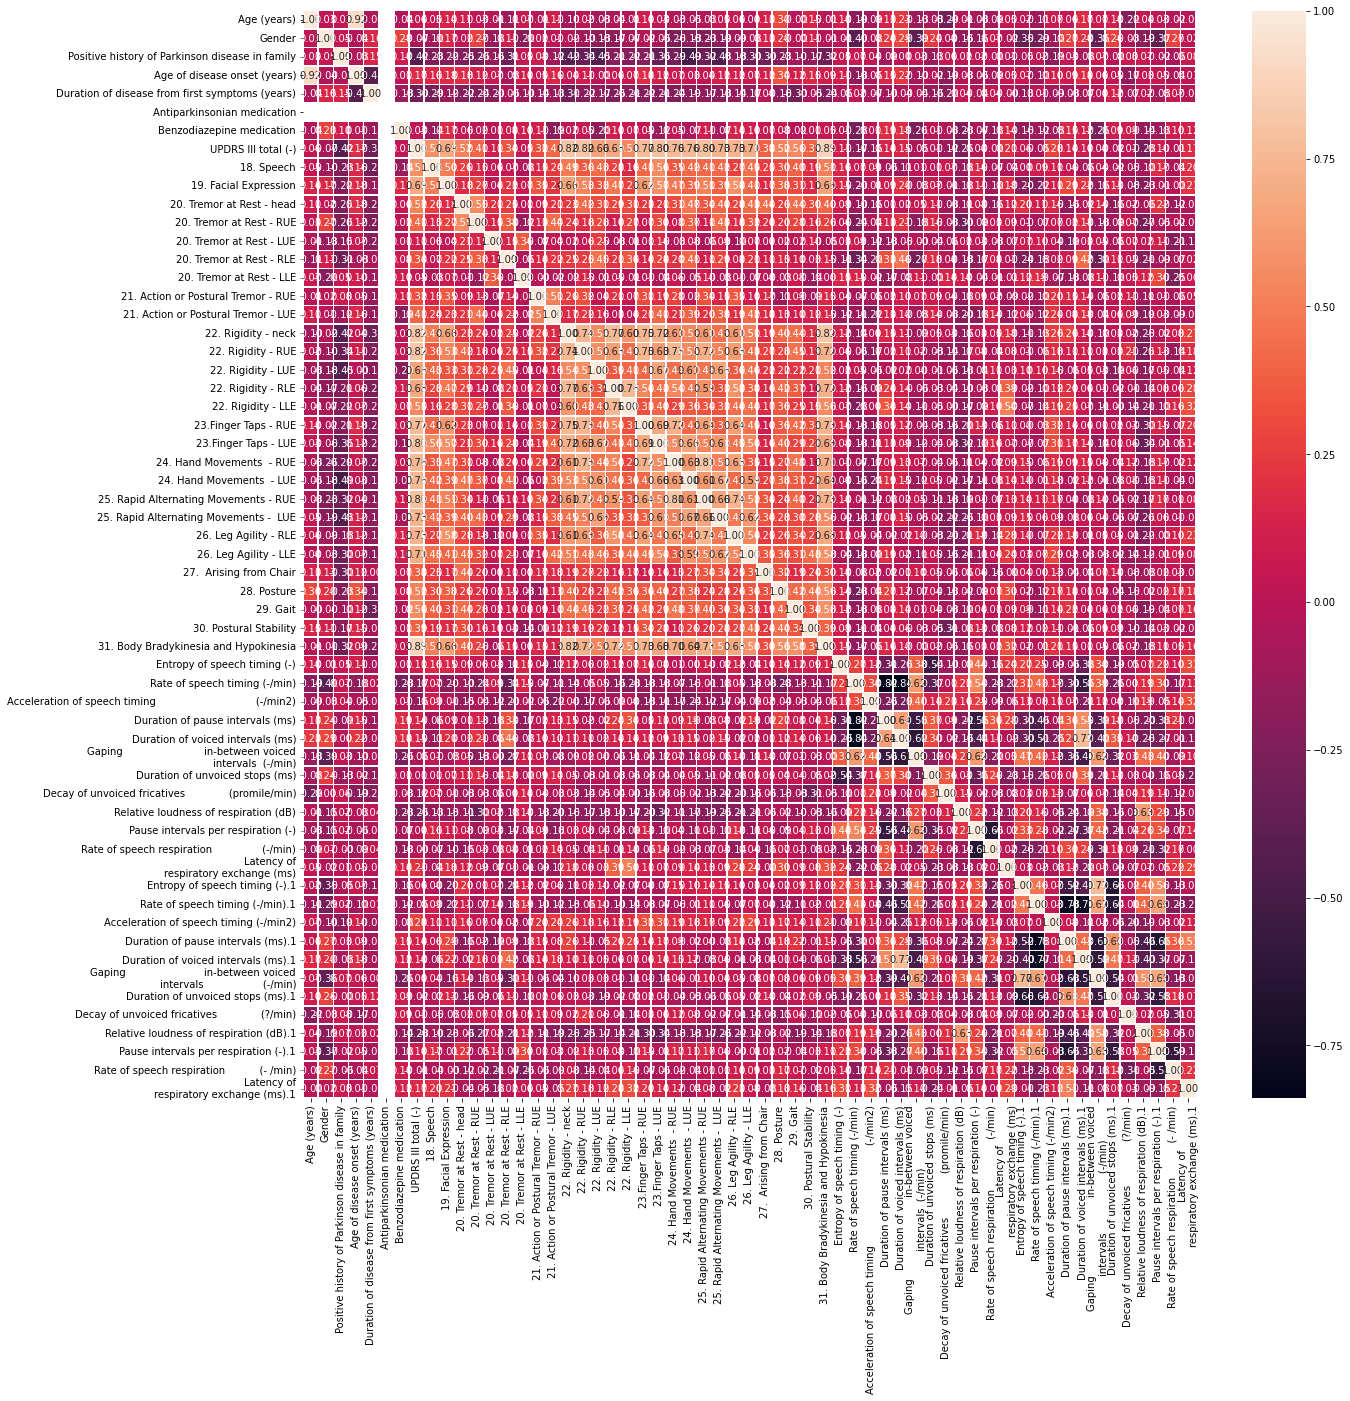

In [19]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [20]:
df_1.corr()

,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antiparkinsonian medication,Benzodiazepine medication,UPDRS III total (-),18. Speech,19. Facial Expression,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1
Age (years),1.000000,0.026736,0.032440,9.245833e-01,-0.043365,NaN,-0.039400,0.058988,0.045819,0.141923,...,0.073685,0.055026,0.171674,0.067828,0.099201,-0.216621,0.040101,0.028270,-0.024685,-0.002996
Gender,0.026736,1.000000,0.051208,-3.510467e-02,0.158253,NaN,0.276648,-0.069586,-0.104770,0.165496,...,-0.100488,0.268400,0.199477,-0.359792,0.261292,-0.031339,-0.189530,-0.365758,0.271303,0.022541
Positive history of Parkinson disease in family,0.032440,0.051208,1.000000,-2.932072e-02,0.145782,NaN,0.101345,-0.419293,-0.230283,-0.222297,...,-0.193024,0.034047,-0.079965,0.068119,-0.003821,0.076796,0.066725,-0.022525,-0.056468,0.077886
Age of disease onset (years),0.924583,-0.035105,-0.029321,1.000000e+00,-0.420354,NaN,0.009853,0.174609,0.155386,0.180100,...,0.104441,0.085748,0.179408,0.059391,0.046500,-0.168093,0.027061,0.052069,-0.044968,0.011309
Duration of disease from first symptoms (years),-0.043365,0.158253,0.145782,-4.203540e-01,1.000000,NaN,-0.125406,-0.301327,-0.285872,-0.122023,...,-0.086331,-0.078771,-0.065264,0.001050,0.121795,-0.074541,0.016002,-0.077490,0.069802,-0.022594
Antiparkinsonian medication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Benzodiazepine medication,-0.039400,0.276648,0.101345,9.852878e-03,-0.125406,NaN,1.000000,0.034476,-0.140028,0.172037,...,-0.080657,0.152717,0.120817,-0.253827,0.088089,0.089095,-0.142665,-0.127013,0.104378,0.119089
UPDRS III total (-),0.058988,-0.069586,-0.419293,1.746087e-01,-0.301327,NaN,0.034476,1.000000,0.569707,0.693957,...,0.280290,0.136464,0.097655,0.002780,-0.022343,0.014370,-0.281679,0.098273,-0.009057,0.169744
18. Speech,0.045819,-0.104770,-0.230283,1.553863e-01,-0.285872,NaN,-0.140028,0.569707,1.000000,0.499115,...,0.106934,0.057537,-0.056830,0.042951,-0.018875,-0.052393,-0.096885,0.174705,-0.039151,0.202025
19. Facial Expression,0.141923,0.165496,-0.222297,1.801001e-01,-0.122023,NaN,0.172037,0.693957,0.499115,1.000000,...,0.109209,0.290608,0.215872,-0.156007,0.131987,-0.084510,-0.226662,-0.011924,-0.004431,0.213503


In [21]:
df_1.head()

,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antiparkinsonian medication,Benzodiazepine medication,UPDRS III total (-),18. Speech,19. Facial Expression,...,Acceleration of speech timing (-/min2),Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1
0,58,0,1,56,2.0,1,1,8,0,1,...,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,68,0,1,67,1.0,1,1,22,1,1,...,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,68,1,1,67,1.0,1,1,19,0,2,...,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,75,1,1,73,2.0,1,1,24,0,2,...,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,61,1,0,60,0.7,1,1,54,1,3,...,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [22]:
X = df_1.drop('Positive history of Parkinson disease in family', axis=1).values
y = df_1['Positive history of Parkinson disease in family'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.linear_model import LogisticRegression
logir = LogisticRegression()



In [23]:
pd.DataFrame.from_records

<bound method DataFrame.from_records of <class 'pandas.core.frame.DataFrame'>>

In [25]:
x=df_1.drop(['Positive history of Parkinson disease in family'],axis=1)
y=df_1['Positive history of Parkinson disease in family']

In [26]:
x.columns

Index(['Age (years)', 'Gender', 'Age of disease onset (years)',
       'Duration of disease from first symptoms (years)',
       'Antiparkinsonian medication', 'Benzodiazepine medication',
       'UPDRS III total (-)', '18. Speech', '19. Facial Expression',
       '20. Tremor at Rest - head', '20. Tremor at Rest - RUE',
       '20. Tremor at Rest - LUE', '20. Tremor at Rest - RLE',
       '20. Tremor at Rest - LLE', '21. Action or Postural Tremor - RUE',
       '21. Action or Postural Tremor - LUE', '22. Rigidity - neck',
       '22. Rigidity - RUE', '22. Rigidity - LUE', '22. Rigidity - RLE',
       '22. Rigidity - LLE', '23.Finger Taps - RUE', '23.Finger Taps - LUE',
       '24. Hand Movements  - RUE', '24. Hand Movements  - LUE',
       '25. Rapid Alternating Movements - RUE',
       '25. Rapid Alternating Movements -  LUE', '26. Leg Agility - RLE',
       '26. Leg Agility - LLE', '27.  Arising from Chair', '28. Posture',
       '29. Gait', '30. Postural Stability',
       '31. Body

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


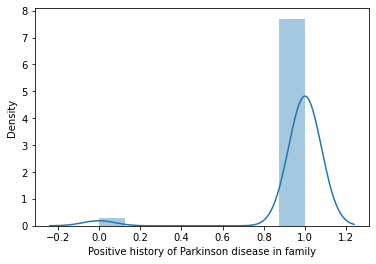

In [28]:
sns.distplot(df_1["Positive history of Parkinson disease in family"])

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.svm import SVC
from sklearn import svm

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [33]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 95.83
Accuracy: 
 0.9583333333333334
[[ 0  1]
 [ 0 23]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        23

    accuracy                           0.96        24
   macro avg       0.48      0.50      0.49        24
weighted avg       0.92      0.96      0.94        24



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

Logistic Regression Training Score: 
 100.0
Logistic Regression Test Score: 
 75.0
Accuracy: 
 0.75
Confusion Matrix: 
 [[ 0  1]
 [ 5 18]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      0.78      0.86        23

    accuracy                           0.75        24
   macro avg       0.47      0.39      0.43        24
weighted avg       0.91      0.75      0.82        24



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)

Gaussian Score: 
 100.0
Gaussian Test Score: 
 95.83


In [38]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_model_score = round(svm_model.score(X_train, y_train) * 100, 2)
Y_predict = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test,Y_predict)*100
print("Accuracy:",svm_accuracy)
cm = confusion_matrix(y_test,Y_predict)
print("Confusion Matrix is :", cm)

Accuracy: 79.16666666666666
Confusion Matrix is : [[ 0  1]
 [ 4 19]]


In [39]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}

gs = GridSearchCV(knn, param_grid=params)
knn_model = gs.fit(X_train,y_train)

knn_model_score = round(knn_model.score(X_train, y_train) * 100, 2)
Y_predict = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test,Y_predict)*100
print("Accuracy:",knn_accuracy)
cm = confusion_matrix(y_test,Y_predict)
print("Confusion Matrix is :", cm)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 95.83333333333334
Confusion Matrix is : [[ 0  1]
 [ 0 23]]


In [40]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest','SVM Model', "KNN"],
    'Score': [ logreg_score, gauss_score, random_forest_score,svm_model_score,knn_model_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test,svm_accuracy,knn_accuracy]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
4,KNN,96.43,95.833333
1,Gaussian Naive Bayes,100.00,95.830000
2,Random Forest,100.00,95.830000
3,SVM Model,100.00,79.166667
0,Logistic Regression,100.00,75.000000
